In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [18]:
ds = pd.read_csv("Advertising.csv")
ds.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Text(0, 0.5, 'Sales')

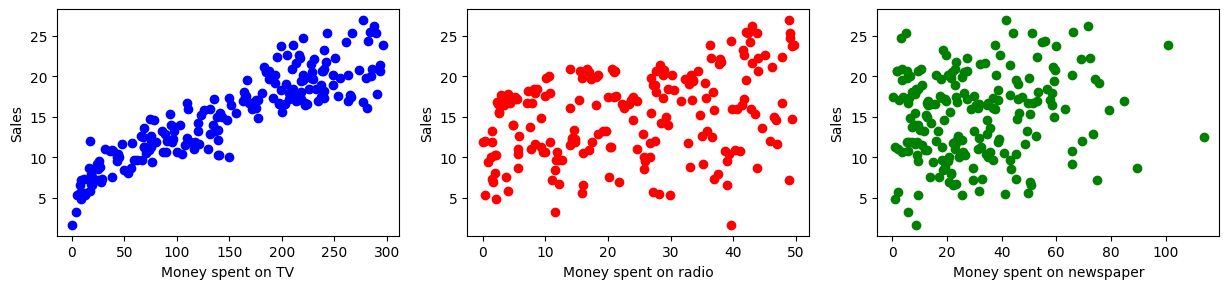

In [19]:
graph = plt.figure(figsize=(15,10))
graph.add_subplot(3,3,1)
plt.scatter(ds["TV"],ds["Sales"],c = "blue")
plt.xlabel("Money spent on TV")
plt.ylabel("Sales")

graph.add_subplot(3,3,2)
plt.scatter(ds["Radio"],ds["Sales"],c = "red")
plt.xlabel("Money spent on radio")
plt.ylabel("Sales")

graph.add_subplot(3,3,3)
plt.scatter(ds["Newspaper"],ds["Sales"],c = "green")
plt.xlabel("Money spent on newspaper")
plt.ylabel("Sales")

In [21]:
def LinReg(x,y):
    x_train,x_test,y_train,y_test = train_test_split(ds[x],ds[y],test_size = 0.3)
    x_train = x_train.to_numpy().reshape(-1,1)
    x_test = x_test.to_numpy().reshape(-1,1)
    y_train = y_train.to_numpy().reshape(-1,1)
    y_test = y_test.to_numpy().reshape(-1,1)
    
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    print("coeff=",lr.coef_[0][0])
    print("intercept=",lr.intercept_[0])
    print("the linear model of {} and {} is Y = {:.2}X + {:.3}".format(x,y,lr.coef_[0][0],lr.intercept_[0]))
    
    mse = mean_squared_error(y_test,pred)
    mae = mean_absolute_error(y_test,pred)
    rmse = np.sqrt(mean_squared_error(y_test,pred))
    print("errors are mse {},mae {},rmse {}".format(mse,mae,rmse))

    
    plt.scatter(x_train,y_train)
    plt.scatter(x_test,y_test)
    plt.title(x +"VS"+ y)
    plt.xlabel("money spent on "+x)
    plt.ylabel(y)
    plt.plot(x_test,pred,c = "purple")

coeff= 0.05615611287580915
intercept= 6.98310930784597
the linear model of TV and Sales is Y = 0.056X + 6.98
errors are mse 5.650471954256071,mae 1.907100875711702,rmse 2.377072139051752
coeff= 0.11291327004742994
intercept= 12.47660141821927
the linear model of Radio and Sales is Y = 0.11X + 12.5
errors are mse 20.82077160857932,mae 4.043307550919136,rmse 4.562978370382586
coeff= 0.048342692158275954
intercept= 13.441315581899307
the linear model of Newspaper and Sales is Y = 0.048X + 13.4
errors are mse 28.56338650869561,mae 4.607197689087044,rmse 5.3444725192197975


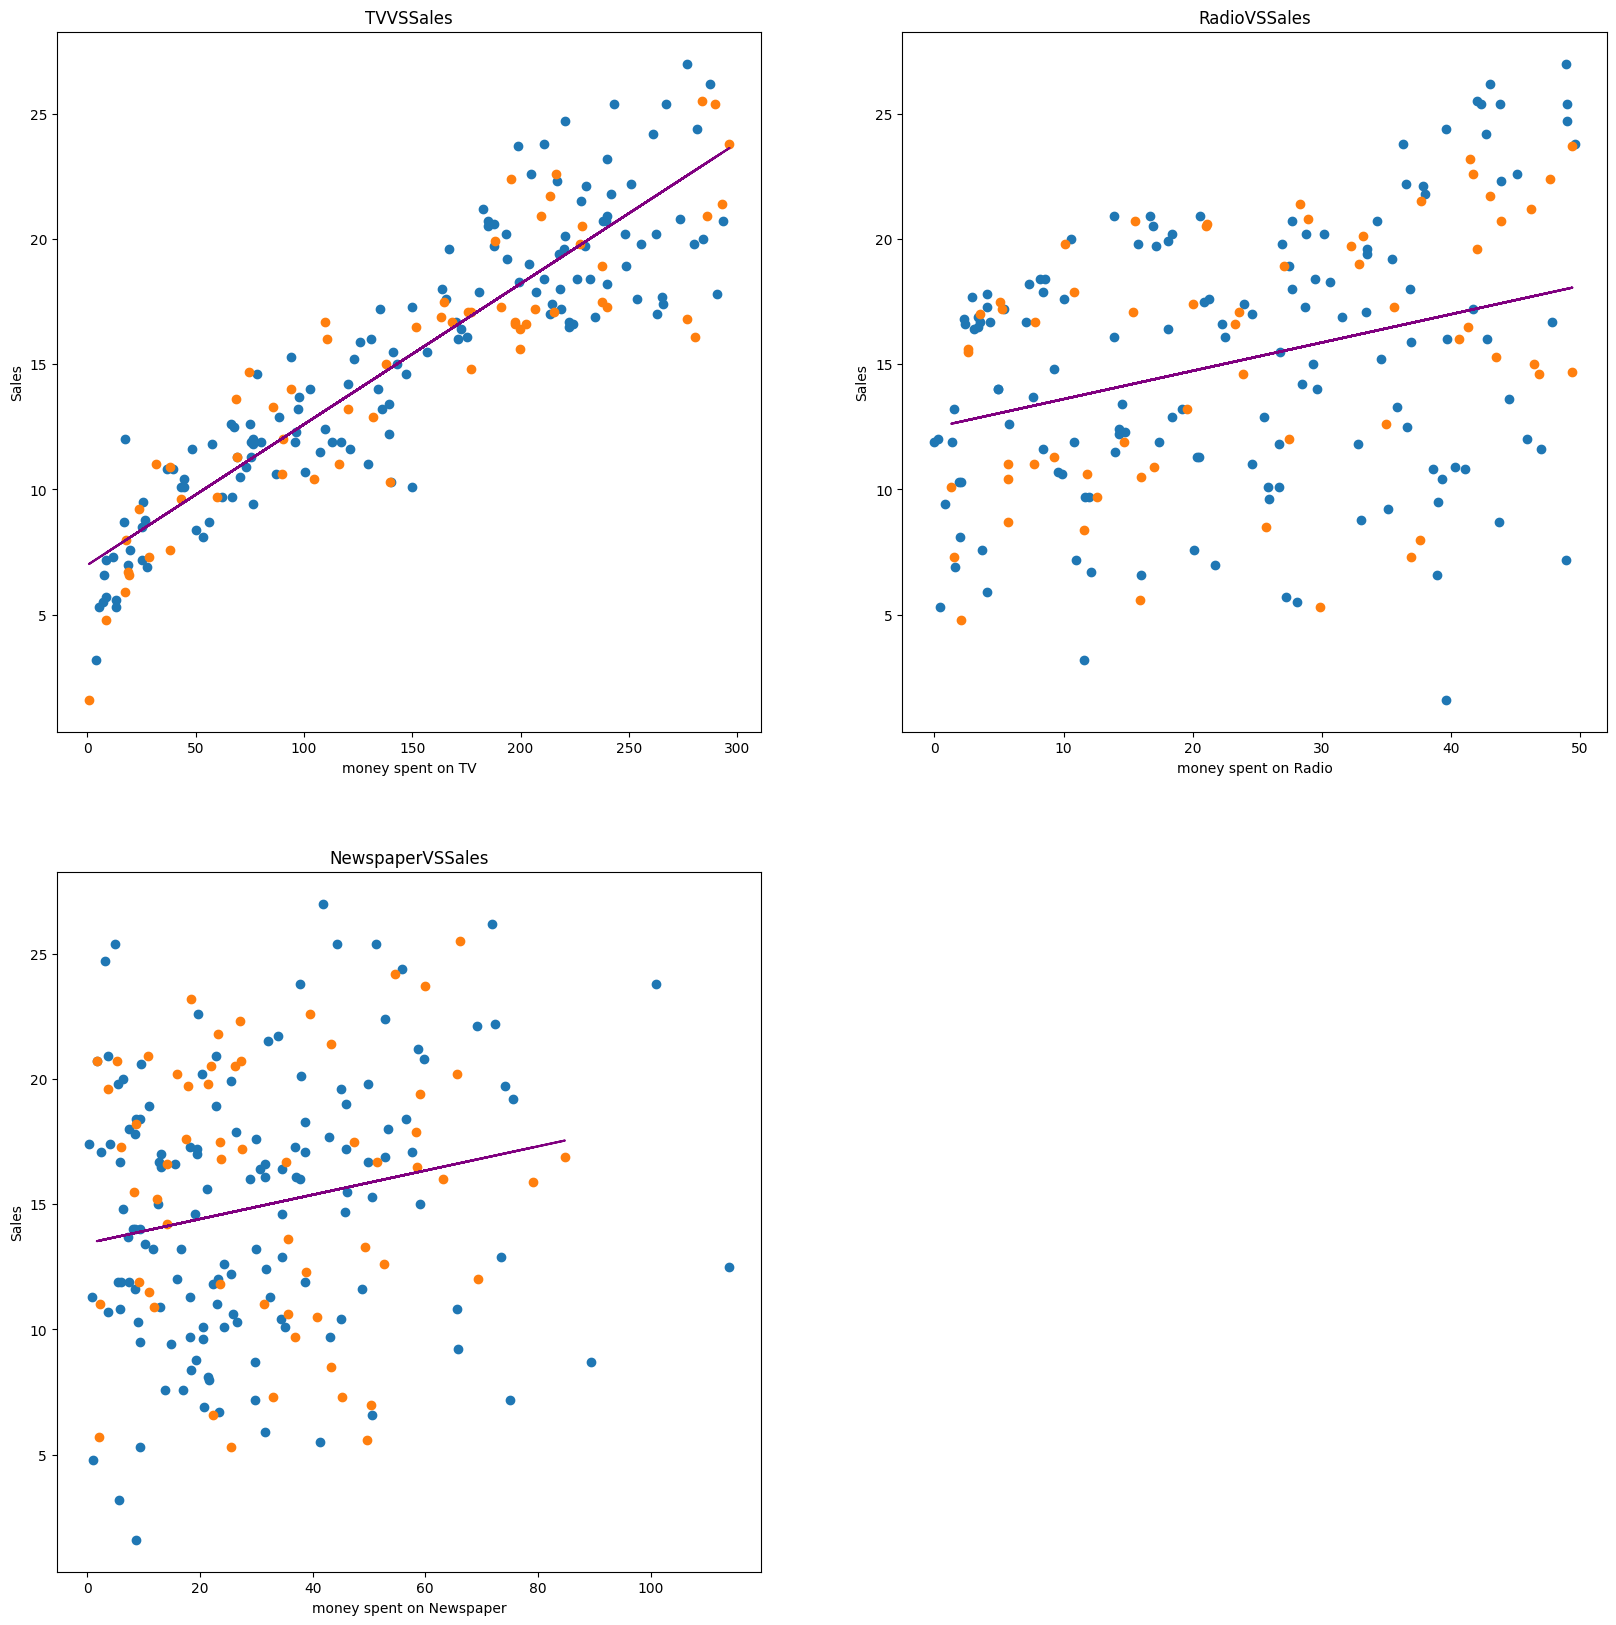

In [22]:
graphh = plt.figure(figsize = (20,20))
graphh.add_subplot(2,2,1)
LinReg("TV","Sales")
graphh.add_subplot(2,2,2)
LinReg("Radio","Sales")
graphh.add_subplot(2,2,3)
LinReg("Newspaper","Sales")